In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('/content/cleanedData3.csv')

features = [col for col in df.columns if col not in ["RR Date", 'Unnamed: 0', "Abandoned Status Date", "production_time", 'Well Authorization Number']]
target = "production_time"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

#Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} days")
print(f"RMSE: {rmse:.2f} days")
print(f"R² Score: {r2:.2f}")

MAE: 753.30 days
RMSE: 1286.72 days
R² Score: 0.81


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#What is being tested
param_grid = {
    'n_estimators': np.arange(50, 500, 50),  # Number of trees
    'max_depth': [10, 20, 30, 50, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples per split
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'max_features': ['sqrt', 'log2'],  # Features per split
}

rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='neg_mean_absolute_error',  # Minimize MAE
    n_jobs=-1, verbose=2, random_state=42
)

random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': np.int64(150), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}


MAE: 784.05 days
RMSE: 1293.88 days
R² Score: 0.81


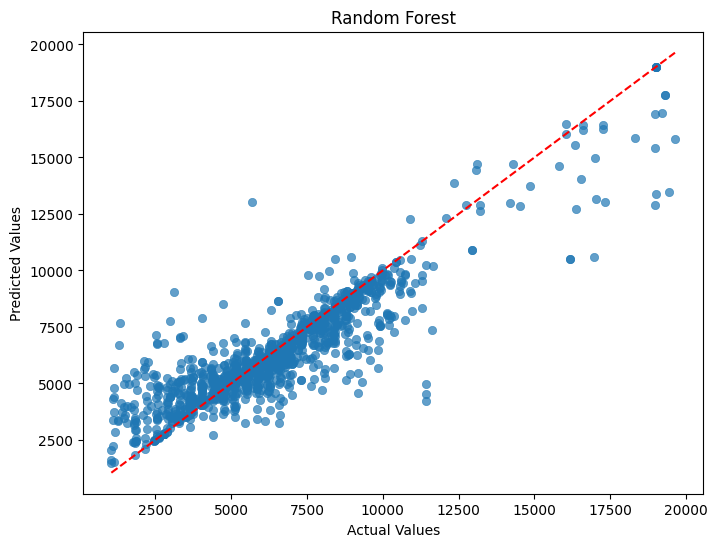

In [ ]:

df = pd.read_csv('/content/cleanedData3.csv')

features = [col for col in df.columns if col not in ["RR Date", "Abandoned Status Date", "production_time", 'Well Authorization Number']]
target = "production_time"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

#Model
rf_model = RandomForestRegressor(n_estimators=150, max_depth=50, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} days")
print(f"RMSE: {rmse:.2f} days")
print(f"R² Score: {r2:.2f}")

#Performance Graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest")
plt.show()


<ipython-input-14-ff7deb45d962>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


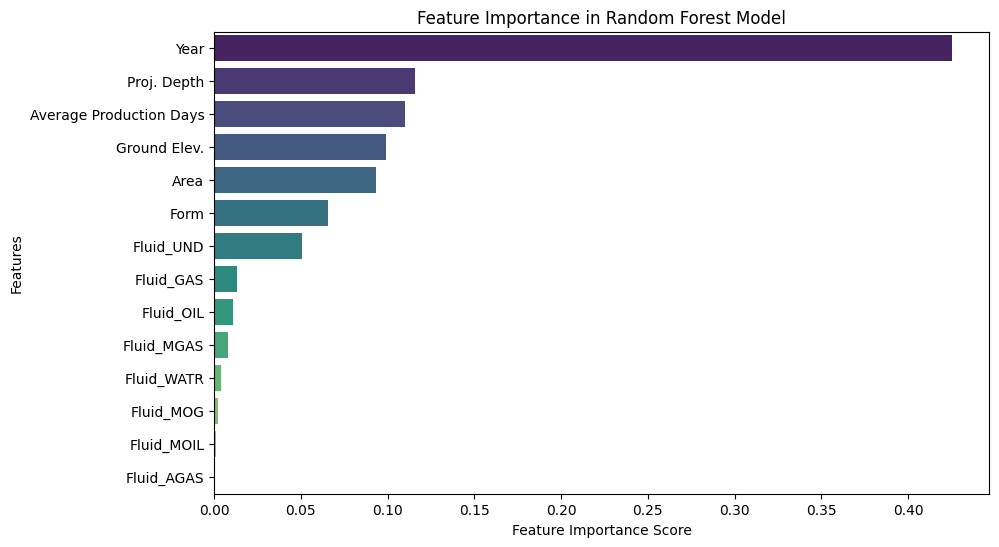

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


Linear Regression MAE: 1350.15 days
Linear Regression RMSE: 1791.08 days
Linear Regression R² Score: 0.63


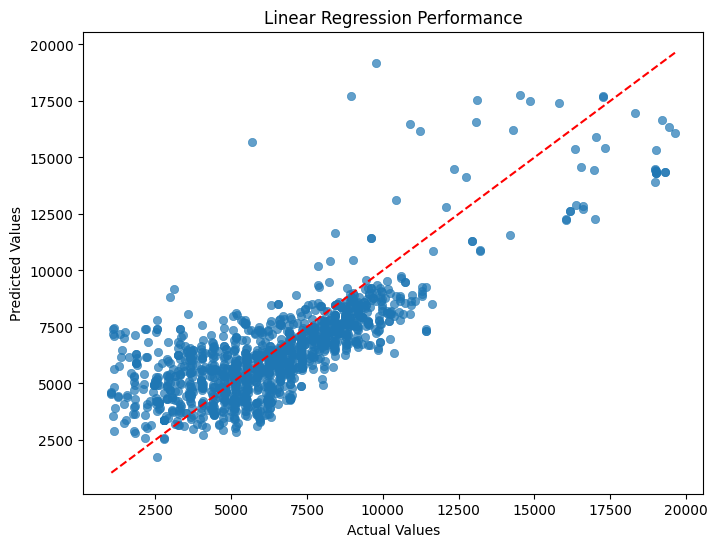

In [ ]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr:.2f} days")
print(f"Linear Regression RMSE: {rmse_lr:.2f} days")
print(f"Linear Regression R² Score: {r2_lr:.2f}")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Performance")
plt.show()

Polynomial Regression (Degree 2) MAE: 1287.14 days
Polynomial Regression (Degree 2) RMSE: 1764.71 days
Polynomial Regression (Degree 2) R² Score: 0.64


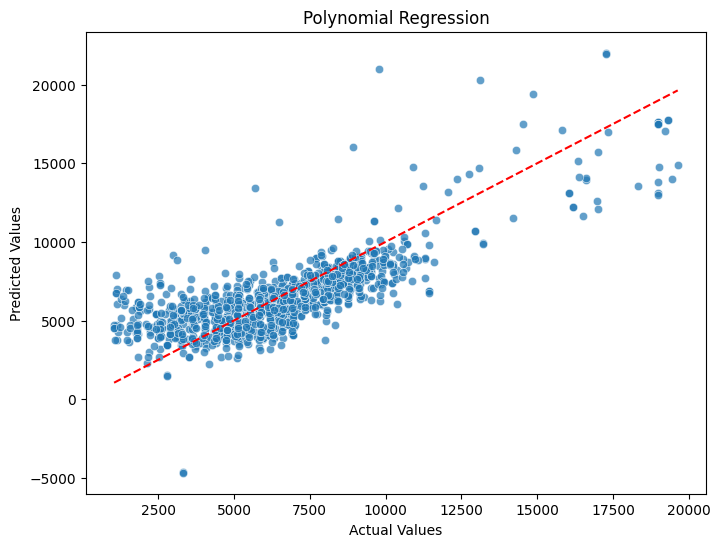

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the polynomial degree (start with 2)
degree = 2

# Create a pipeline that first transforms the data, then applies Linear Regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to training data
poly_model.fit(X_train, y_train)

# Predict on test data
y_pred_poly = poly_model.predict(X_test)

# Evaluate performance
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {degree}) MAE: {mae_poly:.2f} days")
print(f"Polynomial Regression (Degree {degree}) RMSE: {rmse_poly:.2f} days")
print(f"Polynomial Regression (Degree {degree}) R² Score: {r2_poly:.2f}")

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression")
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=200,   # Number of trees (boosting rounds)
    max_depth=15,        # Tree depth (controls complexity)
    learning_rate=0.1,  # Step size shrinkage
    subsample=0.8,      # Random subset of data to prevent overfitting
    colsample_bytree=0.8, # Random subset of features per tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f} days")
print(f"XGBoost RMSE: {rmse_xgb:.2f} days")
print(f"XGBoost R² Score: {r2_xgb:.2f}")


XGBoost MAE: 649.55 days
XGBoost RMSE: 1239.03 days
XGBoost R² Score: 0.82


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5]
}

# Initialize model
xgb_model = xgb.XGBRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,  # More iterations = better results
    scoring="neg_mean_absolute_error",
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


XGBoost MAE: 658.59 days
XGBoost RMSE: 1203.76 days
XGBoost R² Score: 0.83


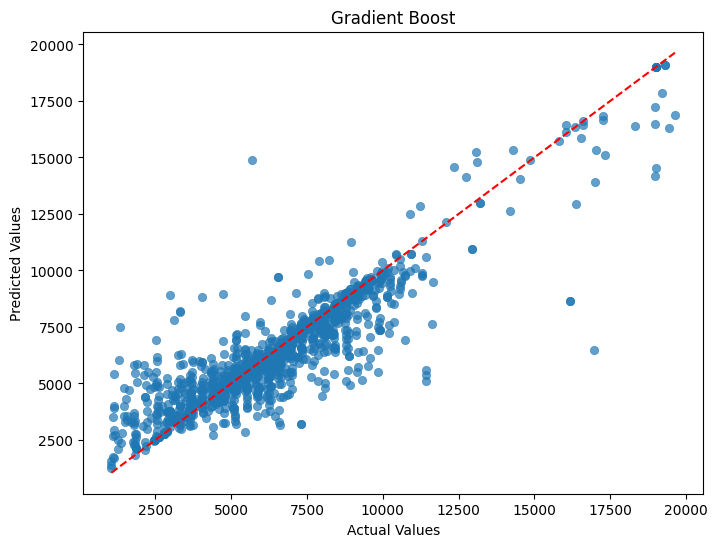

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=300,   # Number of trees (boosting rounds)
    max_depth=10,        # Tree depth (controls complexity)
    learning_rate=0.1,  # Step size shrinkage
    subsample=0.8,      # Random subset of data to prevent overfitting
    colsample_bytree=0.6, # Random subset of features per tree
    random_state=42,
    min_child_weight = 1,
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f} days")
print(f"XGBoost RMSE: {rmse_xgb:.2f} days")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boost")
plt.show()

<ipython-input-20-ff7deb45d962>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


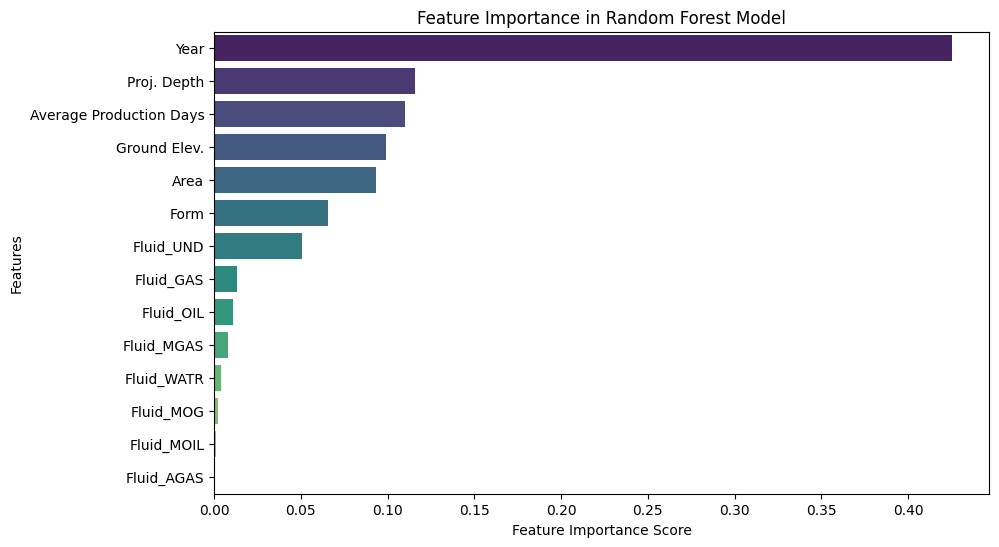

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()